# Experimental data

The data we used for parameter inference in this paper have been previously published by _Fearnley et al 2014_. In the experiment the human umbilical vein endothelial cells (HUVECs) were stimulated with VEGF-A ligand (using isoform VEGF-A$_{121}$ or VEGF-A$_{165}$). The intensity of VEGFR2 phosphorylation (at the residue Y1175) and the intensity of ERK phosphorylation (at the residues Tr202 and Tr204 simultaneously) were measured and quantified using western blot analysis. The data were collected at four time points ($t \in T = \left\lbrace 5 \ min \right.$, $15 \ min$, $30\ min$, $\left.60\ min\right\rbrace$), for each initial ligand concentration ($c_l\in C_L = \{ 0.025nM,0.25nM,1.25nM\}$) and each isoform under consideration ($iso\in I = \{165,121\}$). All these intensities were given normalised by the levels of a control protein called ({\it Tubuline}), and where all the experiments were repeated four or six times.

# Normalisation and its consequence
The data for the phosphorylated VEGFR2 receptors protein levels (pVEGFR2) are summarised in Table 1.  In particular, the experimental intensity value $	ei(j,p,t,iso,c_l)$ corresponds  to the  $j$th experiment, $j \in \{1,2,3,4,5,6\}$, when measuring the levels of  protein $p \in \left\lbrace  \text{pVEGFR2, pERK} \right\rbrace$ at time  $t \in T$ after the ligand stimulation with  isoform $iso\in I$ and using the ligand concentration $c_l\in C_L$. Each data point $data(j,p,t,iso,c_l)$  was computed relative to a specific experiment,
\begin{eqnarray}
data(j,p,t,iso,c_l) &=& \frac{ei(j,p,t,iso,c_l)}{ei(j,p,t=5 \ min,iso=165,c_l=1.25nM)}.
\label{eq: isoform, data(j,p,iso,c_l)}	
\end{eqnarray}

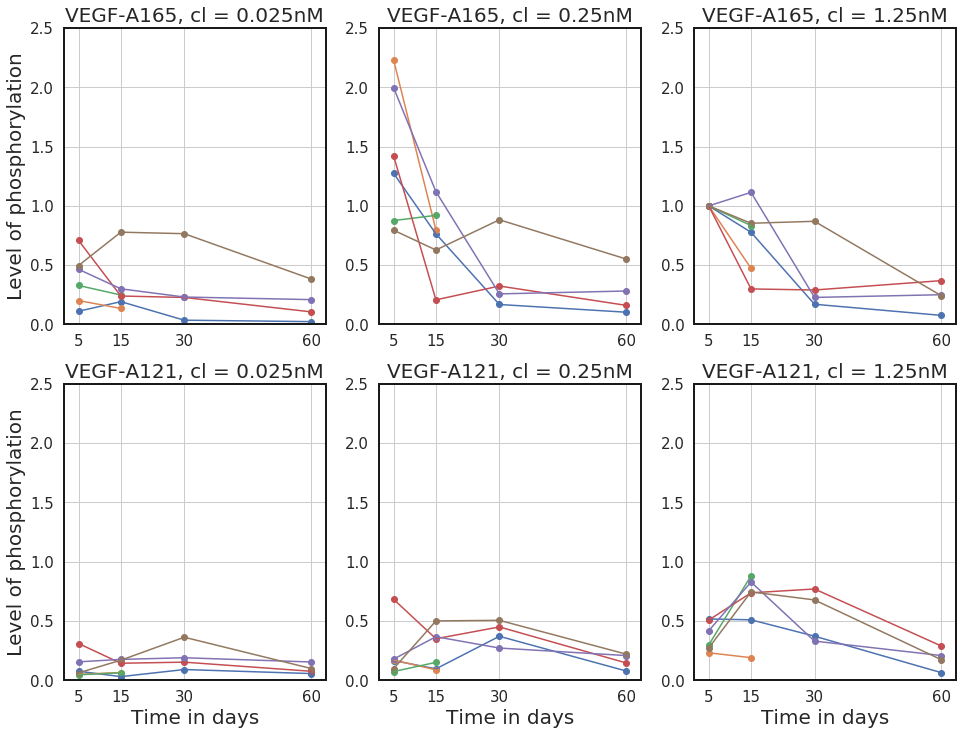

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
from scipy.integrate import odeint
import matplotlib.patches as mpatches
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from scipy.special import logit
from scipy.special import expit
import scipy.stats
import math

# Define some parameters for nice plots
sns.set_style("whitegrid")
my_axis_fontsize = 15
my_lab_fontsize = 20
my_tit_fontsize = 20
palette = sns.color_palette()
#sns.palplot(palette)

# Define data frame which contains all observations
df = pd.DataFrame()

df['time'] = [5.,5.,5.,5.,5.,5.,5.,15.,15.,15.,15.,15.,15.,15.,30.,30.,30.,30.,30.,30.,30.,60.,60.,60.,60.,60.,60.,60.]
df['conc'] = [0.,0.025,0.25,1.25,0.025,0.25,1.25,0.,0.025,0.25,1.25,0.025,0.25,1.25,0.,0.025,0.25,1.25,0.025,0.25,
              1.25,0.,0.025,0.25,1.25,0.025,0.25,1.25]
df['iso'] = ['none',165,165,165,121,121,121,'none',165,165,165,121,121,121,'none',165,165,165,121,121,121,'none',165,165,
             165,121,121,121]
df['set1'] = [0.0035575714,0.11132365,1.2740077358,1.,0.0765509492,0.1668638667,0.5170657593,0.1236339806,0.1926835614,
              0.7642575023,0.7775098059,0.0309980504,0.0966172999,0.5099644114,0.0162035263,0.0361912303,0.168570485,
              0.1705809873,0.0908178704,0.3711193794,0.3720809751,0.0513725437,0.024138434,0.1034273654,0.0766612266,
              0.0567229579,0.0780333965,0.064149561]
df['set2'] = [0.0290623029,0.2016807021,2.2291898407,1.,0.0505096377,0.1705836867,0.2320744114,0.0515953935,0.1353737104,
              0.7975269282,0.4734967272,0.0657081701,0.0878916565,0.1907239925,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
              np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
df['set3'] = [0.030616119,0.3291722246,0.8762754833,1.,0.0468036704,0.0738414136,0.2977818851,0.0167982909,0.2485932472,
              0.9202194614,0.8342452534,0.0625457161,0.1511175166,0.8811723915,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
              np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
df['set4'] = [0.0729483283,0.7092198582,1.4204660588,1.,0.3100303951,0.6828774063,0.5075987842,0.0729483283,0.2401215805,
              0.2077001013,0.2998986829,0.1438703141,0.3505572442,0.7375886525,0.0729483283,0.2279635258,0.3242147923,
              0.2907801418,0.1529888551,0.4498480243,0.7700101317,0.0729483283,0.1063829787,0.1610942249,0.3698074975,
              0.0759878419,0.1458966565,0.2887537994]
df['set5'] = [0.1094470046,0.465437788,1.9965437788,1.,0.1555299539,0.1785714286,0.418202765,0.1647465438,0.3006912442,
              1.1198156682,1.1140552995,0.1762672811,0.3675115207,0.8283410138,0.1347926267,0.2315668203,0.2580645161,
              0.2281105991,0.1900921659,0.2718894009,0.3306451613,0.1647465438,0.2096774194,0.2822580645,0.2511520737,
              0.1543778802,0.2085253456,0.2085253456]

df['set6'] = [0.0433121019,0.4968152866,0.7949044586,1.,0.0624203822,0.098089172,0.272611465,0.0840764331,0.778343949,
              0.6280254777,0.8535031847,0.1694267516,0.5006369427,0.7452229299,0.2038216561,0.7656050955,0.8828025478,
              0.8700636943,0.3630573248,0.5057324841,0.6777070064,0.2687898089,0.3834394904,0.5515923567,0.2420382166,
              0.0993630573,0.2203821656,0.1732484076]

def sort_data(DF, cl, iso):
    ind_con = DF['conc'] == cl
    ind_iso = DF['iso'] == iso
    index = ind_con & ind_iso
    newdf = DF.copy()
    newdf = newdf.loc[index, :]
    newdf = newdf.reset_index(drop=True)
    return newdf

'''
Plot data
'''

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(16,12))
plt.grid(True, which = 'both')
AX = [ax1, ax2, ax3, ax4, ax5, ax6]
for ax in AX:
    for axis in ['top','bottom','left','right']: 
        ax.spines[axis].set_color('k')  
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(labelsize = my_axis_fontsize)
    ax.set_xticks([0, 5, 15, 30, 60]) 
    #ax.set_xticklabels([10, 20, 30, 40, 50, 60, 70])
cl = [0.025, 0.25, 1.25]
for i in range(1,7):
    df1 = sort_data(df, 0.025, 165)
    df2 = sort_data(df, 0.25, 165)
    df3 = sort_data(df, 1.25, 165)
    ax1.scatter(df1['time'], df1['set%s'%i])
    ax1.plot(df1['time'], df1['set%s'%i])
    ax2.scatter(df2['time'], df2['set%s'%i])
    ax2.plot(df2['time'], df2['set%s'%i])
    ax3.scatter(df3['time'], df3['set%s'%i])
    ax3.plot(df3['time'], df3['set%s'%i])
    ax1.set_ylabel('Level of phosphorylation', fontsize = my_lab_fontsize)
    ax1.set_title('VEGF-A165, cl = 0.025nM', fontsize = my_tit_fontsize)
    ax2.set_title('VEGF-A165, cl = 0.25nM', fontsize = my_tit_fontsize)
    ax3.set_title('VEGF-A165, cl = 1.25nM', fontsize = my_tit_fontsize)

    df4 = sort_data(df, 0.025, 121)
    df5 = sort_data(df, 0.25, 121)
    df6 = sort_data(df, 1.25, 121)
    ax4.scatter(df4['time'], df4['set%s'%i])
    ax4.plot(df4['time'], df4['set%s'%i])
    ax5.scatter(df5['time'], df5['set%s'%i])
    ax5.plot(df5['time'], df5['set%s'%i])
    ax6.scatter(df6['time'], df6['set%s'%i])
    ax6.plot(df6['time'], df6['set%s'%i])
    
    ax4.set_ylabel('Level of phosphorylation', fontsize = my_lab_fontsize)
    ax4.set_title('VEGF-A121, cl = 0.025nM', fontsize = my_tit_fontsize)
    ax5.set_title('VEGF-A121, cl = 0.25nM', fontsize = my_tit_fontsize)
    ax6.set_title('VEGF-A121, cl = 1.25nM', fontsize = my_tit_fontsize)

    ax4.set_xlabel('Time in days', fontsize = my_lab_fontsize)
    ax5.set_xlabel('Time in days', fontsize = my_lab_fontsize)
    ax6.set_xlabel('Time in days', fontsize = my_lab_fontsize)
    
    
ax1.set_ylim(0,2.5)
ax2.set_ylim(0,2.5)
ax3.set_ylim(0,2.5)
ax4.set_ylim(0,2.5)
ax5.set_ylim(0,2.5)
ax6.set_ylim(0,2.5)
plt.savefig('data_y1175.pdf', bbox_inches='tight',  pad_inches = 1.5)      

# Mathematical description
Diagrams of a) reactions in the trafficking model: (1) binding (with rate $\alpha_+$) of free receptor ($R_S$)  with free ligand ($L_S$)  on the cell surface, forming monomer ($M_S$), and (2) dissociation (with rate $\alpha_-$); (3) binding (with rate $\beta_+$) of monomer ($M_S$) with free receptor ($R_S$) on the cell surface, forming phosphorylated dimer ($P_S$), and (4) dissociation (with rate $\beta_-$); (5) internalisation of free receptor ($R_S$) and  (6) monomers ($M_S$) with rate $k_{int}$ and  (7) phosphorylated dimers ($P_S$) bound to VEGF-A$_{iso}$ with rate $k_{int}^{P,iso}$; (8) recycling  of free receptor ($R_E$) with rate $k_{rec}$; (9) dissociation of phosphorylated dimers ($P_E$) and (10) monomers ($M_E$) (formed with VEGF-A$_{iso}$) in the endosome, occurring with the same rates than on the cell surface but multiplied by a factor $f^{iso}\geq1$ (related to the more acidic environment of the endosome); (11) degradation of free receptors ($R_E$) with rate $k_{deg}$ in the endosome; (12) synthesis of new free receptors ($R_S$) with rate $k_{syn}$ on the cell surface.

<img src="model.png" style="height:500px">

In [44]:
'''
Here we consider model1 or model2 for the process.
Phosphorylation steps in 
Model1 - Ligand+Receptor <-> Monomer + Ligand <->  Phospho Dimer
'''

# Model ODE
def ode_model1(xini, t, par):
    alpp, alpm, betp, betm, krec, kdeg, kintM, kintP, f, nrt = par
    ksyn =kdeg*nrt/5.
    kintR =(krec+kdeg)/3.
    ls, rs, ms, ds, re, me, de = xini
    dls = -2*alpp*ls*rs+alpm*ms
    drs = ksyn -2*alpp*ls*rs+alpm*ms-betp*ms*rs+2*betm*ds-kintR*rs+krec*re
    dms = 2*alpp*ls*rs-alpm*ms-betp*ms*rs+2*betm*ds-kintM*ms
    dds = betp*ms*rs-2*betm*ds-kintP*ds
    dre = kintR*rs-krec*re-kdeg*re+2*f*betm*de+f*alpm*me
    dme = kintM*ms+2*f*betm*de-f*alpm*me
    dde = kintP*ds-2*f*betm*de
    
    dres = np.array([dls, drs, dms, dds, dre, dme, dde])
    return dres

def sim_data(xini, t, par, parNorm):
    simData = odeint(ode_model1, xini, t, args=(par,))
    xiniNorm = list(xini)
    xiniNorm[0] = 1.25*10**5*6.022
    simDataNorm = odeint(ode_model1, xiniNorm, t, args=(parNorm,))
    tind = np.where(t==5)[0][0]
    res = (np.array(simData.T[3])+np.array(simData.T[6]))/(simDataNorm.T[3][tind]+simDataNorm.T[6][tind])
    return res

def get_data_to_compare(DF, iso, cl):
    newDF = sort_data(DF, cl, iso)
    t5 = newDF.T[0][3:10].values
    t15 = newDF.T[1][3:10].values
    tint = newDF.T[2][3:10].values
    t30 = np.array([value for value in tint if not math.isnan(value)])
    tint = newDF.T[3][3:10].values
    t60 = np.array([value for value in tint if not math.isnan(value)])
    return t5, t15, t30, t60
    

# Fitting - ABC algorithm.
We used ABC algorithm to fit data to model1. Results for model1 are stored in file model1_bothpost.csv.
Algorithm itself is stored in file model1.py. We run $10^6$ iteration. The results below are showed for 1000 best fits. 

# Results for Model1 - prior vs posterior for VEGF-165 related parameters.

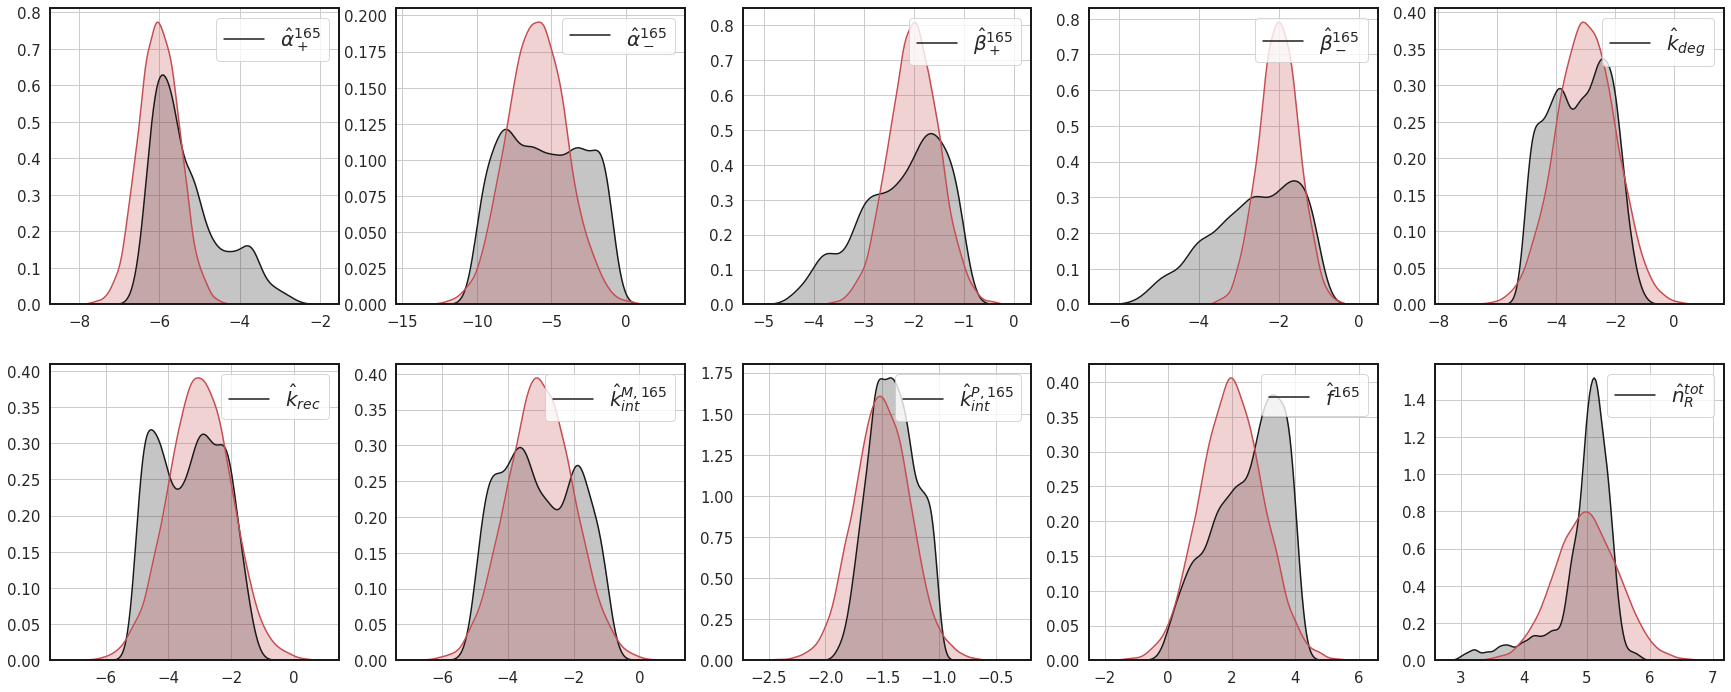

In [45]:
'''
We plot here prior (red) vs posterior (black) distribution for isoform VEGF-165.
'''
sns.set_style("whitegrid")
dfpam = pd.DataFrame()
dfpam = pd.read_csv('model1_bothpost.csv')
nametag = ['alpp165','alpm165','betp165','betm165','kdeg','krec','kintM165','kintP165','f165','nrt']
nametag2 = [r'$\hat{\alpha}_+^{165}$',r'$\hat{\alpha}_-^{165}$',r'$\hat{\beta}_+^{165}$',r'$\hat{\beta}_-^{165}$',
            r'$\hat{k}_{deg}$',r'$\hat{k}_{rec}$',r'$\hat{k}_{int}^{M,165}$',r'$\hat{k}_{int}^{P,165}$',r'$\hat{f}^{165}$',r'$\hat{n}_R^{tot}$']
pamonly = pd.DataFrame()
logpamonly = pd.DataFrame()
for i in range(0, len(nametag)):
    pamonly[nametag2[i]] = dfpam[nametag[i]]
    logpamonly[nametag2[i]] = np.log10(dfpam[nametag[i]].values)
from scipy.stats import gaussian_kde

fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2,5, figsize=(30,12))
plt.grid(True, which = 'both')
AX = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
i = 0
for ax in AX:
    for axis in ['top','bottom','left','right']: 
        ax.spines[axis].set_color('k')  
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(labelsize = my_axis_fontsize)
    sns.kdeplot(logpamonly[nametag2[i]], shade=True, color = 'k', ax= ax)
    ax.legend(fontsize = 20, loc = 1)
    i = i+1
from scipy.stats import skewnorm
ww = np.random.normal(-6,0.5,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax1)
ww= np.random.normal(-6,2,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax2)
ww= np.random.normal(-2,0.5,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax3)
ww= np.random.normal(-2,0.5,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax4)
ww= np.random.normal(-3,1,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax5)
ww= np.random.normal(-3,1,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax6)
ww= np.random.normal(-3,1,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax7)
ww= np.random.normal(-1.5,0.25,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax8)
ww= np.random.normal(2,1,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax9)
ww= np.random.normal(5,0.5,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax10)
fig.savefig('model1_post_165.pdf', bbox_inches='tight',  pad_inches = 0.1)    

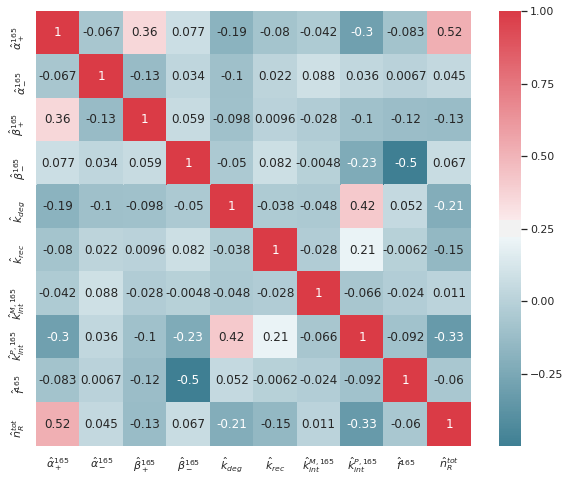

In [46]:
'''
Correlation plot for parameters.
'''
sns.set_style("whitegrid")
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10, 8))
corr = logpamonly.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
fig.savefig('model1_corr_165.pdf', bbox_inches='tight',  pad_inches = 0.1) 

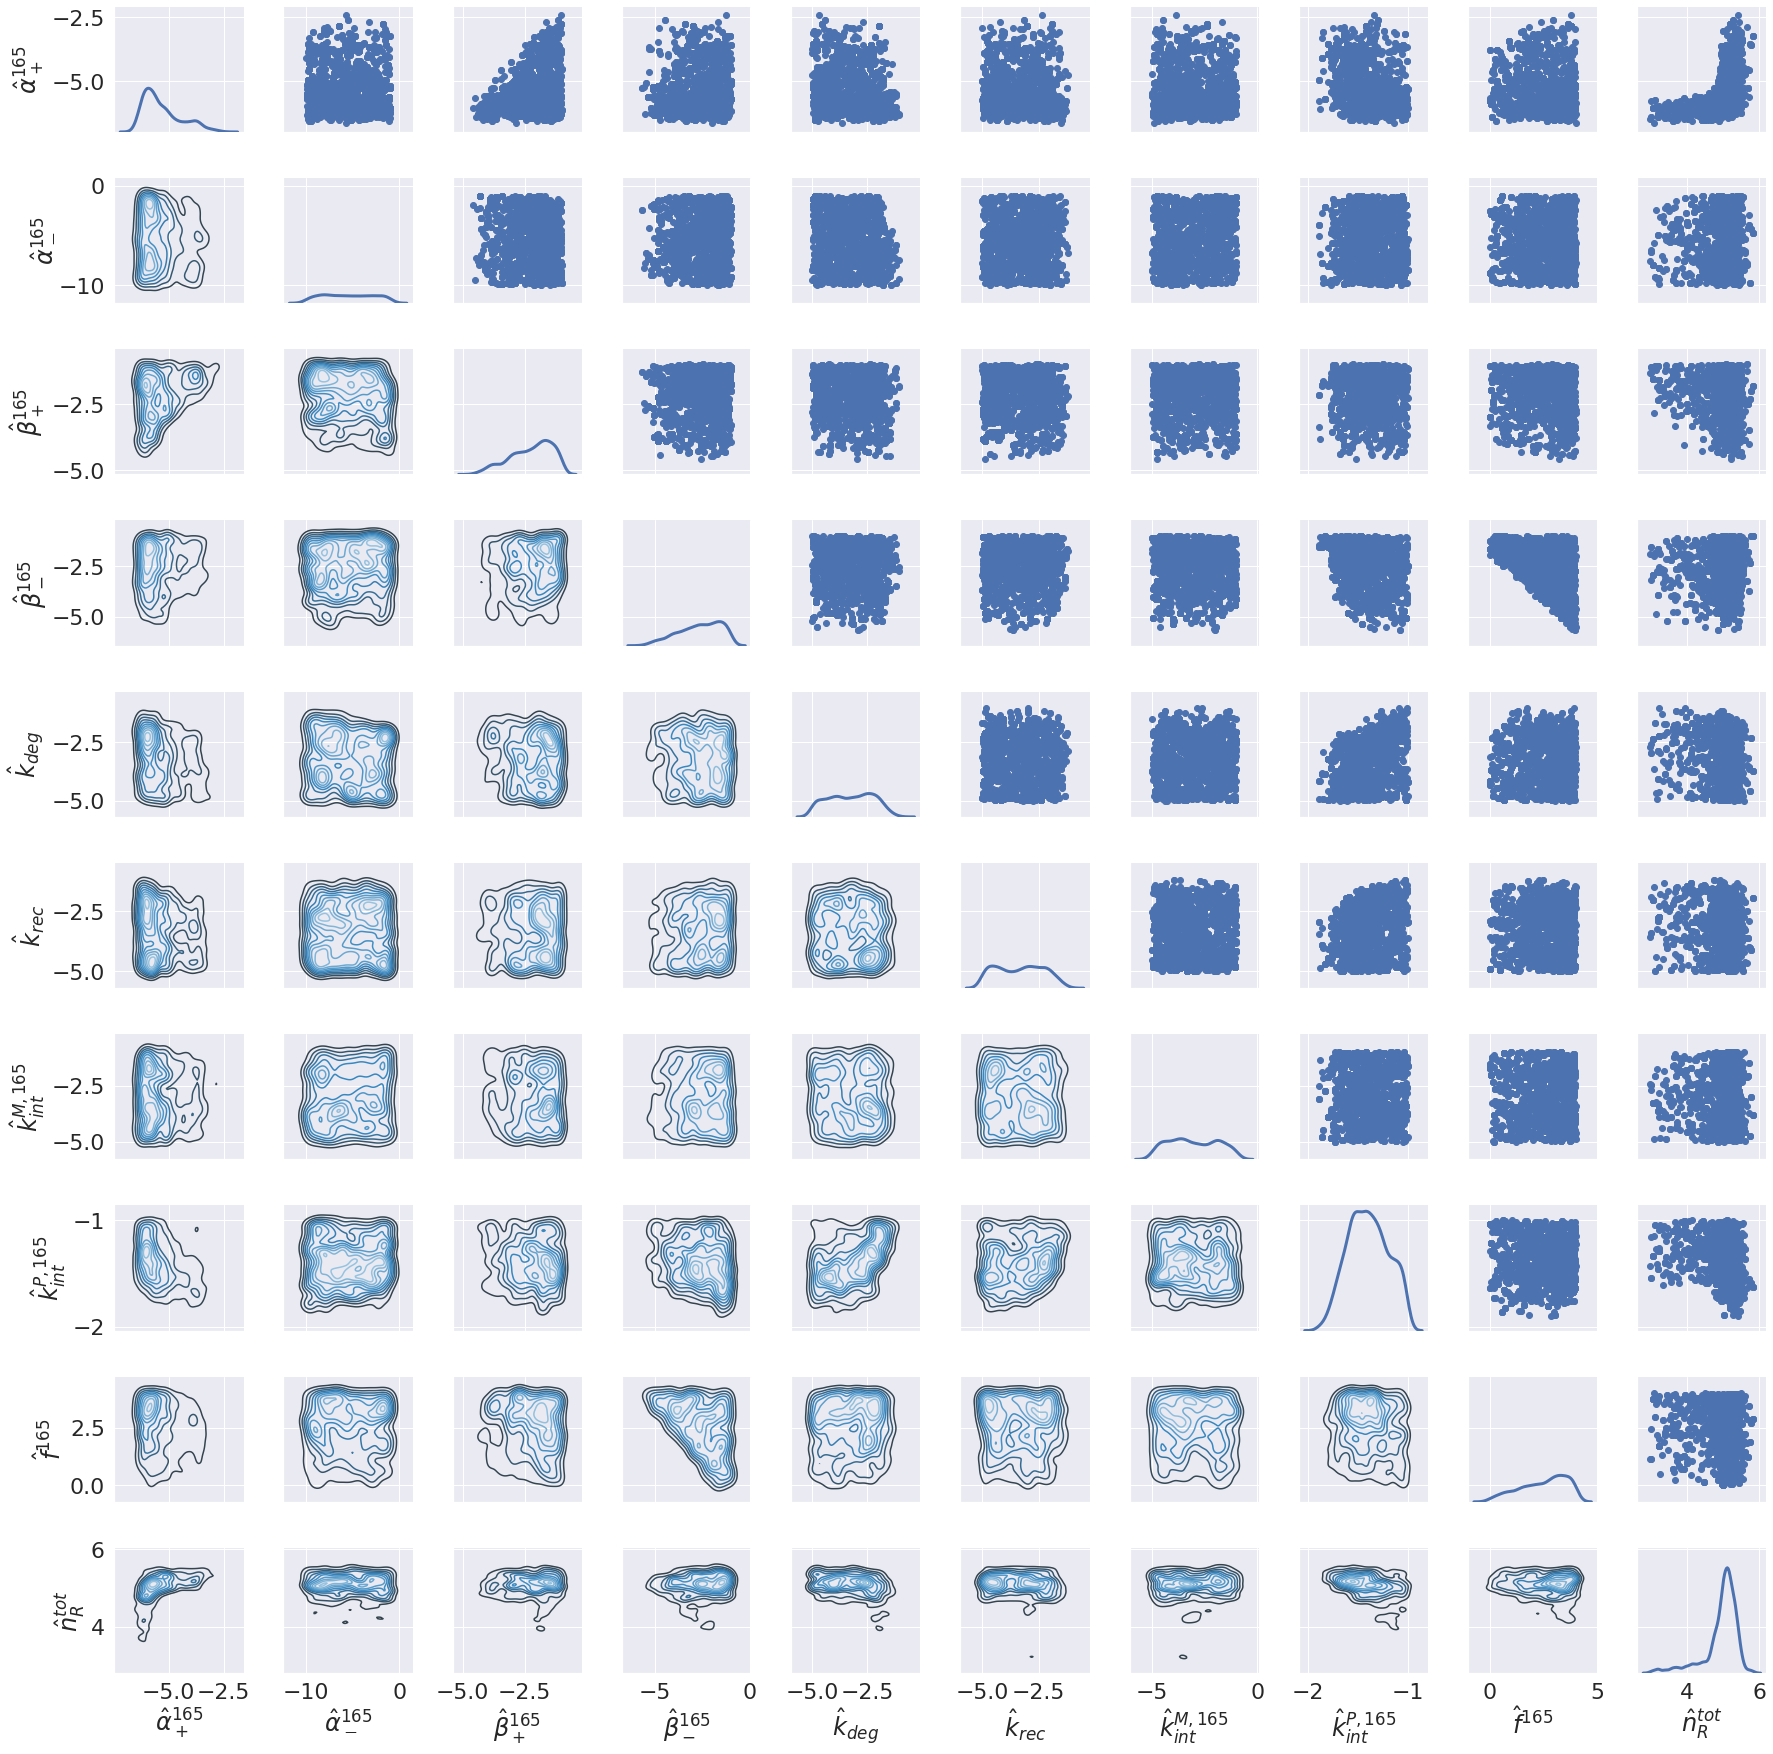

In [28]:
sns.set(font_scale=2)  
g = sns.PairGrid(logpamonly)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)   

# Results for Model1 - prior vs posterior for VEGF-121 related parameters.

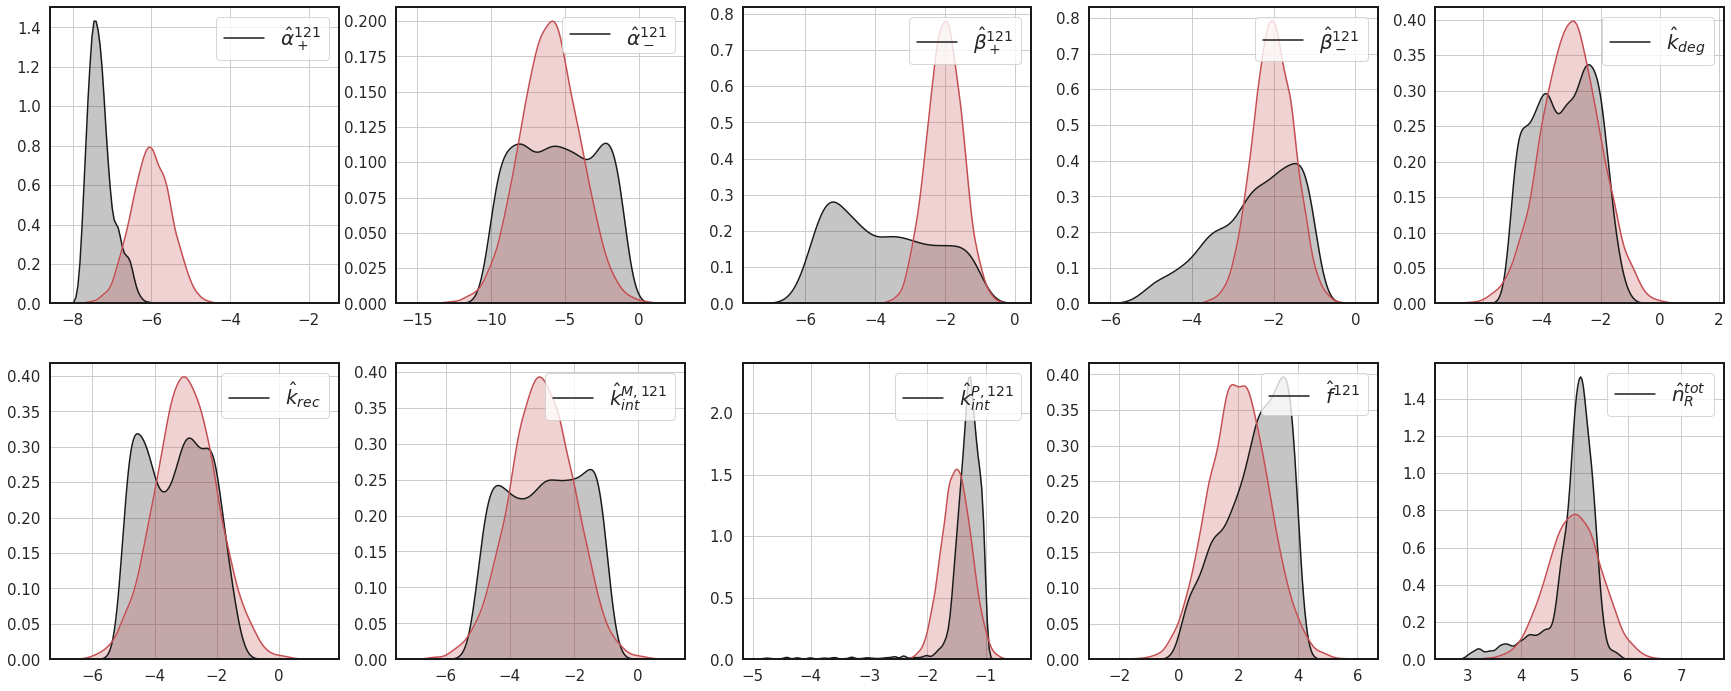

In [47]:
sns.set_style("whitegrid")
dfpam = pd.DataFrame()
dfpam = pd.read_csv('model1_bothpost.csv')
nametag = ['alpp121','alpm121','betp121','betm121','kdeg','krec','kintM121','kintP121','f121','nrt']
nametag2 = [r'$\hat{\alpha}_+^{121}$',r'$\hat{\alpha}_-^{121}$',r'$\hat{\beta}_+^{121}$',r'$\hat{\beta}_-^{121}$',
            r'$\hat{k}_{deg}$',r'$\hat{k}_{rec}$',r'$\hat{k}_{int}^{M,121}$',r'$\hat{k}_{int}^{P,121}$',r'$\hat{f}^{121}$',r'$\hat{n}_R^{tot}$']
pamonly = pd.DataFrame()
logpamonly = pd.DataFrame()
for i in range(0, len(nametag)):
    pamonly[nametag2[i]] = dfpam[nametag[i]]
    logpamonly[nametag2[i]] = np.log10(dfpam[nametag[i]].values)
from scipy.stats import gaussian_kde

fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2,5, figsize=(30,12))
plt.grid(True, which = 'both')
AX = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
i = 0
for ax in AX:
    for axis in ['top','bottom','left','right']: 
        ax.spines[axis].set_color('k')  
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(labelsize = my_axis_fontsize)
    sns.kdeplot(logpamonly[nametag2[i]], shade=True, color = 'k', ax= ax)
    ax.legend(fontsize = 20, loc = 1)
    i = i+1
    
ww = np.random.normal(-6,0.5,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax1)
ww= np.random.normal(-6,2,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax2)
ww= np.random.normal(-2,0.5,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax3)
ww= np.random.normal(-2,0.5,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax4)
ww= np.random.normal(-3,1,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax5)
ww= np.random.normal(-3,1,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax6)
ww= np.random.normal(-3,1,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax7)
ww= np.random.normal(-1.5,0.25,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax8)
ww= np.random.normal(2,1,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax9)
ww= np.random.normal(5,0.5,10000)
sns.kdeplot(ww, shade=True, color = 'r', ax= ax10)
fig.savefig('model1_post_121.pdf', bbox_inches='tight',  pad_inches = 0.1)   

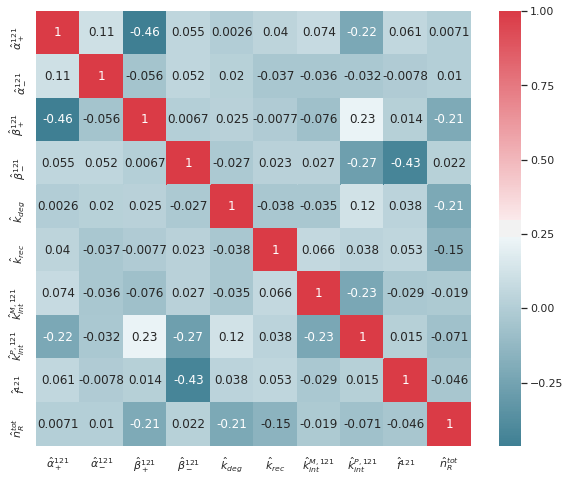

In [31]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10, 8))
corr = logpamonly.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
fig.savefig('model1_corr_121.pdf', bbox_inches='tight',  pad_inches = 0.1)  

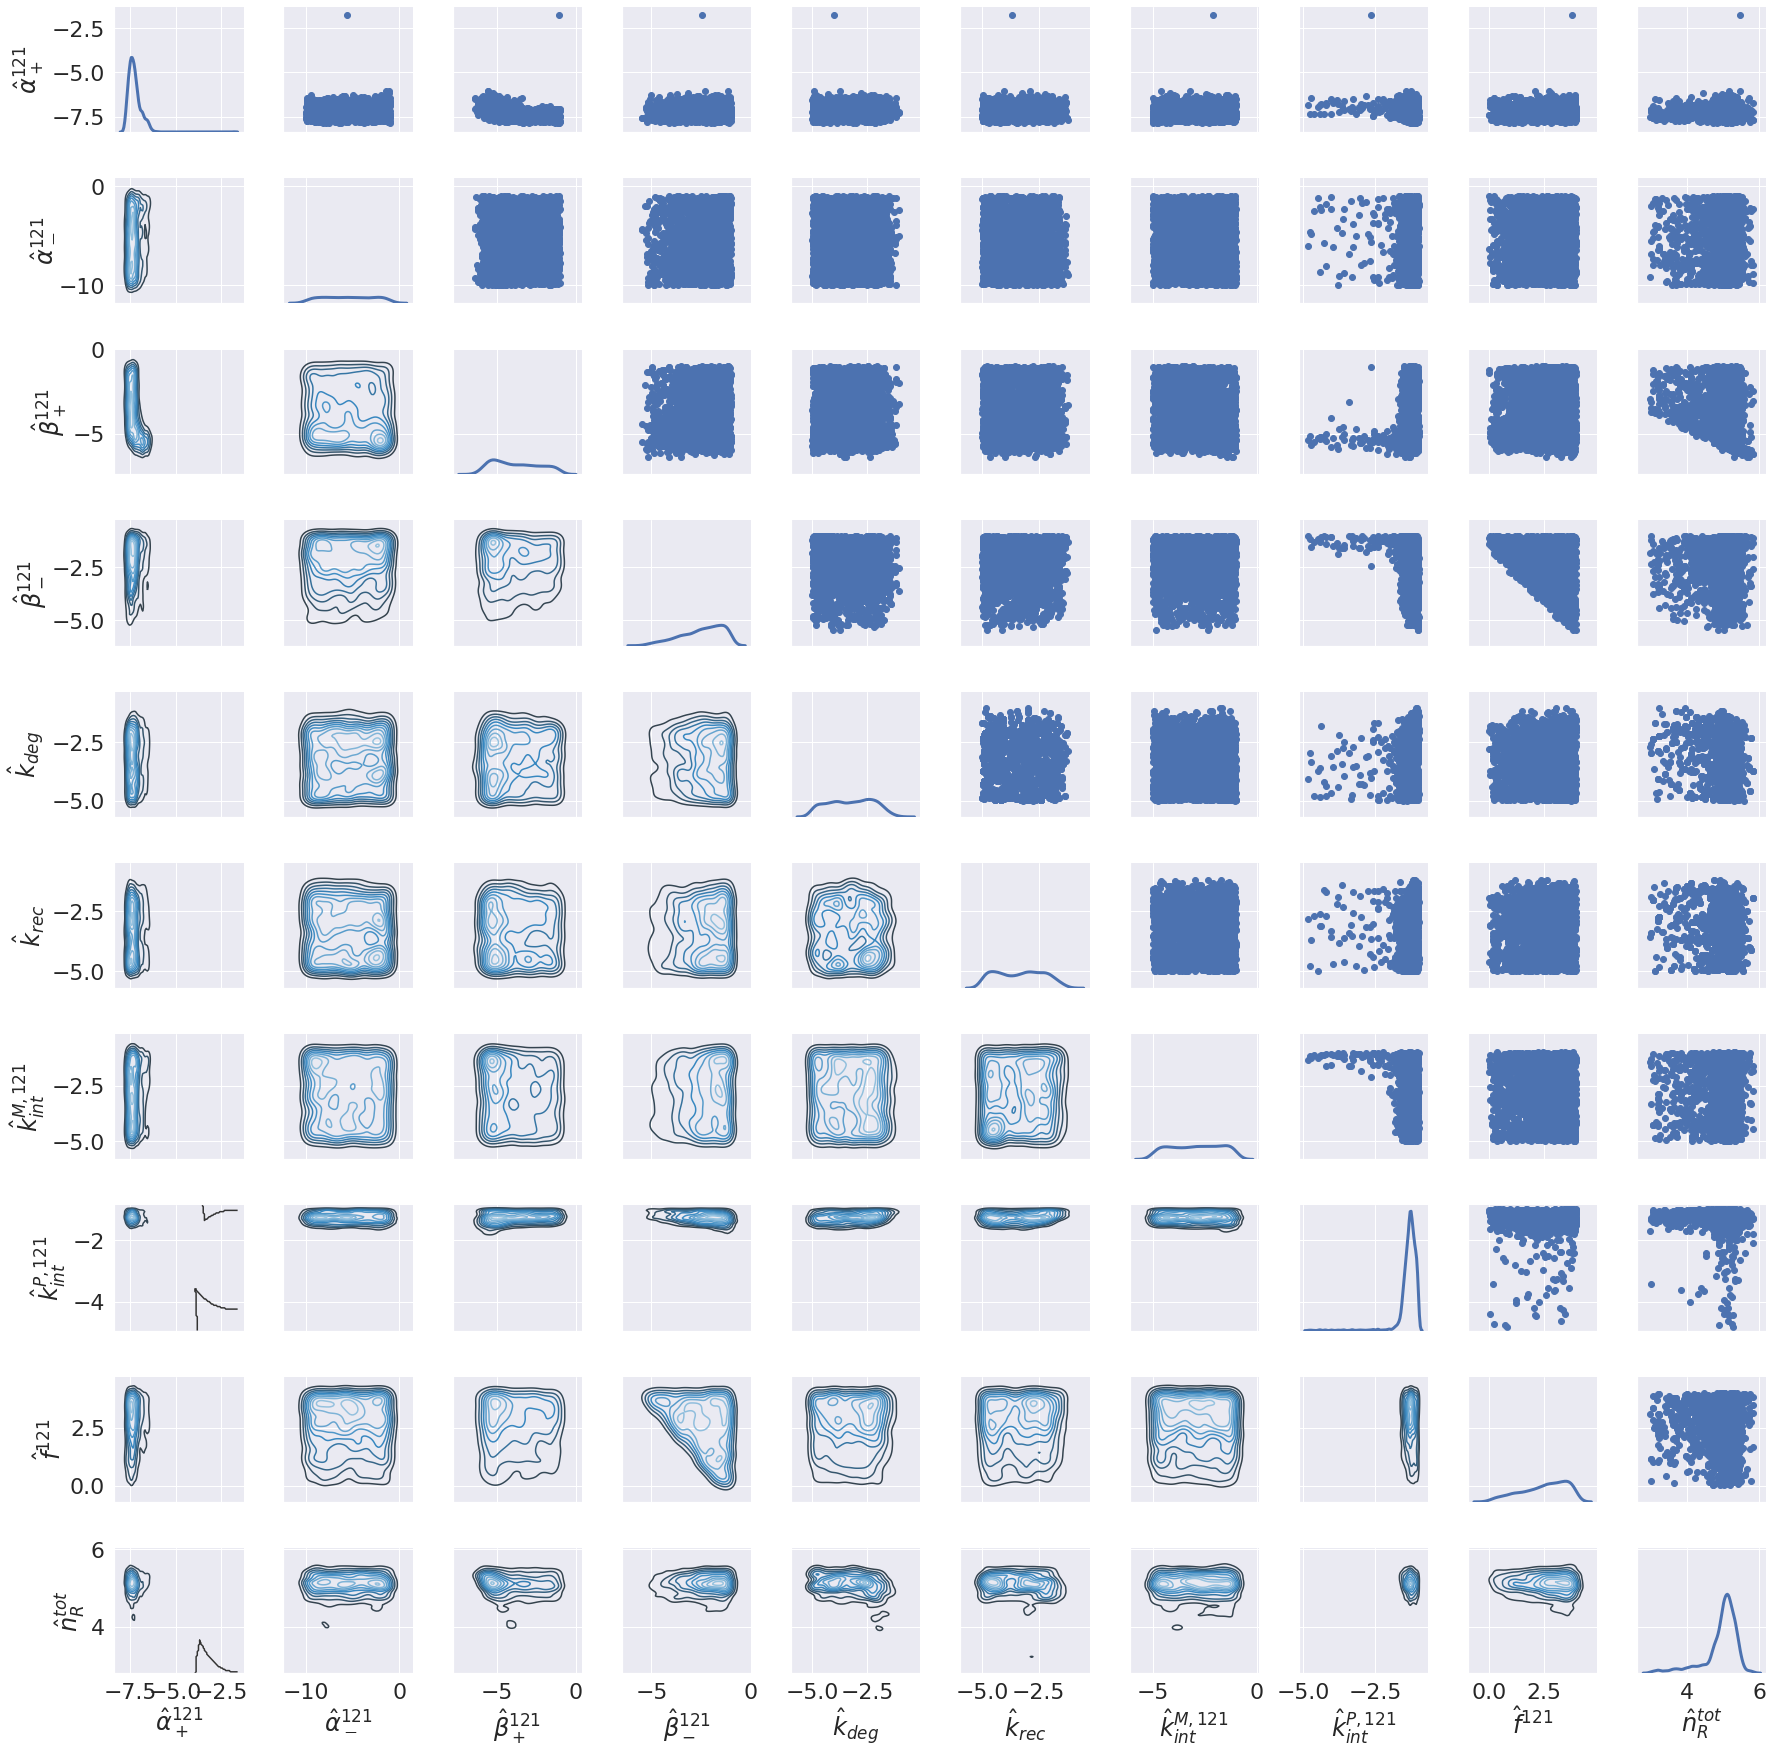

In [9]:
#g = sns.pairplot(logpamonly, diag_kind="kde", markers="+",plot_kws=dict(s=50, edgecolor="b", linewidth=1),diag_kws=dict(shade=True))
sns.set(font_scale=2)  
g = sns.PairGrid(logpamonly)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)    

# Plot fits for Model1

In [48]:
ind, dist, alpp165,alpm165,  alpp121, alpm121, betp165, betm165, betp121, betm121, kdeg, krec, kintM165, kintM121,kintP165,kintP121, f165, f121,nrt=dfpam.T[1].values

In [38]:
'''
Find 95% CI and median from best 1000 results for plotting.
'''

r165 = []
r121 = []

for jj in range(0,1000):
    ind, dist, alpp165,alpm165,  alpp121, alpm121, betp165, betm165, betp121, betm121,  kdeg, krec, kintM165, kintM121,kintP165,kintP121, f165, f121,nrt=dfpam.T[jj].values
    par165 = [alpp165, alpm165, betp165, betm165, krec, kdeg, kintM165, kintP165, f165, nrt]
    par121 = [alpp121, alpm121, betp121, betm121, krec, kdeg, kintM121, kintP121, f121, nrt]

    parNorm = par165
    cini0 = [lig[0], 0.6*nrt, 0., 0., 0.2*nrt, 0., 0.]
    cini1 = [lig[1], 0.6*nrt, 0., 0., 0.2*nrt, 0., 0.]
    cini2 = [lig[2], 0.6*nrt, 0., 0., 0.2*nrt, 0., 0.]

    res0165 = sim_data(cini0, t_vec, par165, parNorm)    
    res1165 = sim_data(cini1, t_vec, par165, parNorm) 
    res2165 = sim_data(cini2, t_vec, par165, parNorm)    
    
    r165.append([res0165, res1165, res2165])
    
    res0121 = sim_data(cini0, t_vec, par121, parNorm)    
    res1121 = sim_data(cini1, t_vec, par121, parNorm)    
    res2121 = sim_data(cini2, t_vec, par121, parNorm)    
                 
    r121.append([res0121, res1121, res2121])

r165 = np.array(r165)
r121 = np.array(r121)
                 
def bounds_boot(res, indr):
    pamlen = len(res)
    boundIndices = [np.int(np.floor(0.975 * pamlen)), np.int(np.ceil(0.025 * pamlen)), np.int(np.floor(0.5 * pamlen)) ]   
    blow = []
    bhigh = []
    bmed = []
    timelen = len(res.T)
    for j in range(0, timelen):
        res_int = res.T[j][indr]
        res_int = np.array(res_int)
        res_int = np.sort(res_int)
        bhigh.append(res_int[boundIndices[0]])
        blow.append(res_int[boundIndices[1]])
        bmed.append(res_int[boundIndices[2]])   
    return(blow, bhigh, bmed)       

bl1650,bh1650, bm1650 = bounds_boot(r165, 0)
bl1651,bh1651, bm1651 = bounds_boot(r165, 1)
bl1652,bh1652, bm1652 = bounds_boot(r165, 2)

bl1210,bh1210, bm1210 = bounds_boot(r121, 0)
bl1211,bh1211, bm1211 = bounds_boot(r121, 1)
bl1212,bh1212, bm1212 = bounds_boot(r121, 2)

/home/maria/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


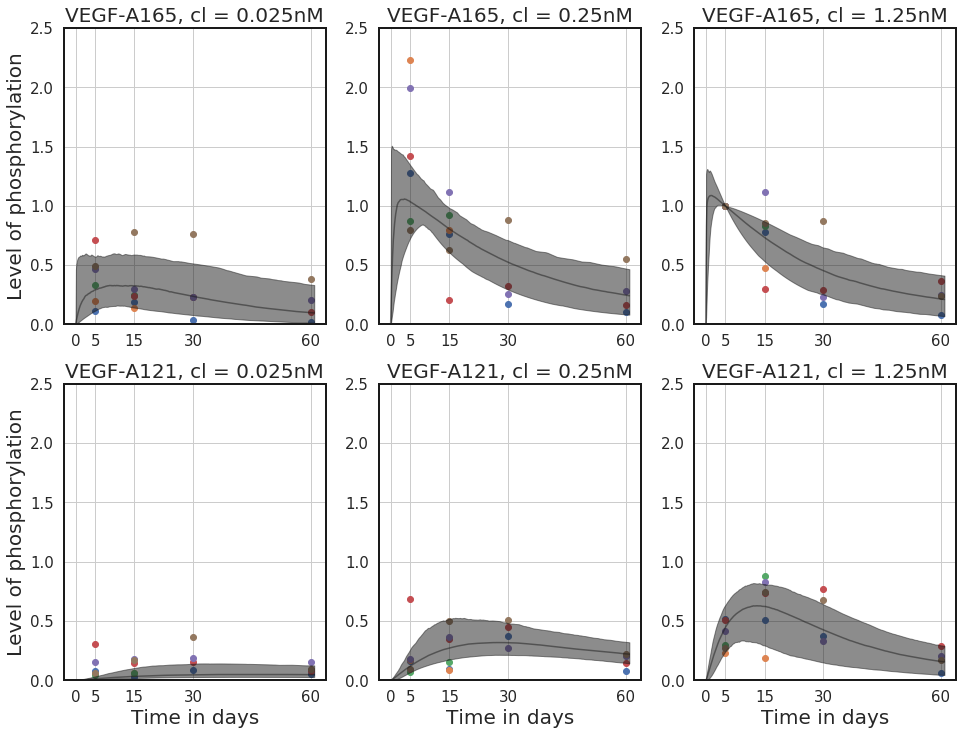

In [40]:
sns.set_style("whitegrid")
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(16,12))
plt.grid(True, which = 'both')
AX = [ax1, ax2, ax3, ax4, ax5, ax6]
for ax in AX:
    for axis in ['top','bottom','left','right']: 
        ax.spines[axis].set_color('k')  
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(labelsize = my_axis_fontsize)
    ax.set_xticks([0, 5, 15, 30, 60]) 
for i in range(1,7):
    df1 = sort_data(df, 0.025, 165)
    df2 = sort_data(df, 0.25, 165)
    df3 = sort_data(df, 1.25, 165)
    ax1.scatter(df1['time'], df1['set%s'%i])
    ax2.scatter(df2['time'], df2['set%s'%i])
    ax3.scatter(df3['time'], df3['set%s'%i])

    df4 = sort_data(df, 0.025, 121)
    df5 = sort_data(df, 0.25, 121)
    df6 = sort_data(df, 1.25, 121)
    ax4.scatter(df4['time'], df4['set%s'%i])
    ax5.scatter(df5['time'], df5['set%s'%i])
    ax6.scatter(df6['time'], df6['set%s'%i])

conc = np.array([0.025,0.25,1.25]) #nM
lig = list(conc*(10**5)*6.022) #molecules
t_vec = np.arange(0,61,0.1)    

ax1.set_ylabel('Level of phosphorylation', fontsize = my_lab_fontsize)
ax1.set_title('VEGF-A165, cl = 0.025nM', fontsize = my_tit_fontsize)
ax2.set_title('VEGF-A165, cl = 0.25nM', fontsize = my_tit_fontsize)
ax3.set_title('VEGF-A165, cl = 1.25nM', fontsize = my_tit_fontsize)

ax4.set_ylabel('Level of phosphorylation', fontsize = my_lab_fontsize)
ax4.set_title('VEGF-A121, cl = 0.025nM', fontsize = my_tit_fontsize)
ax5.set_title('VEGF-A121, cl = 0.25nM', fontsize = my_tit_fontsize)
ax6.set_title('VEGF-A121, cl = 1.25nM', fontsize = my_tit_fontsize)

ax4.set_xlabel('Time in days', fontsize = my_lab_fontsize)
ax5.set_xlabel('Time in days', fontsize = my_lab_fontsize)
ax6.set_xlabel('Time in days', fontsize = my_lab_fontsize)

ax1.set_ylim(0,2.5)
ax2.set_ylim(0,2.5)
ax3.set_ylim(0,2.5)
ax4.set_ylim(0,2.5)
ax5.set_ylim(0,2.5)
ax6.set_ylim(0,2.5)

ax1.plot(t_vec, bm1650, color = 'k', alpha = 0.5)
ax2.plot(t_vec, bm1651, color = 'k', alpha = 0.5)
ax3.plot(t_vec, bm1652, color = 'k', alpha = 0.5)
    
ax4.plot(t_vec, bm1210, color = 'k', alpha = 0.5)
ax5.plot(t_vec, bm1211, color = 'k', alpha = 0.5)
ax6.plot(t_vec, bm1212, color = 'k', alpha = 0.5)

ax1.fill_between(t_vec, bl1650,bh1650, color = 'k', alpha = 0.5)
ax2.fill_between(t_vec, bl1651,bh1651, color = 'k', alpha = 0.5)
ax3.fill_between(t_vec, bl1652,bh1652, color = 'k', alpha = 0.5)
    
ax4.fill_between(t_vec, bl1210,bh1210, color = 'k', alpha = 0.5)
ax5.fill_between(t_vec, bl1211,bh1211, color = 'k', alpha = 0.5)
ax6.fill_between(t_vec, bl1212,bh1212, color = 'k', alpha = 0.5)

fig.savefig('model1 _fitted_data_y1175.pdf', bbox_inches='tight',  pad_inches = 1.5)      


# Sobol analysis

In [54]:
from SALib.sample import saltelli
from SALib.analyze import morris, sobol
from SALib.test_functions import Ishigami
from scipy import arange

problem = {
  'num_vars': 17,
  'names': [r'$\alpha_+^{165}$', r'$\alpha_-^{165}$' , r'$\beta_+^{165}$', r'$\beta_-^{165}$',
            r'$\alpha_+^{121}$', r'$\alpha_-^{121}$' , r'$\beta_+^{121}$', r'$\beta_-^{121}$',
            r'$k_{rec}$', r'$k_{deg}$', 'nrt',
            r'$k_{int165}^M$', r'$k_{int165}^P$', r'$f165$',
            r'$k_{int121}^M$', r'$k_{int121}^P$', r'$f121$'],
  'bounds': [[-10,-6], [-5,-1], [-7,-3],[-6,-2],
             [-10,-6], [-5,-1], [-7,-3],[-6,-2],
             [-5,-1],[-5,-1],[3,6],
             [-5,-1],[-5,-1],[0,4],
             [-5,-1],[-5,-1],[0,4]]
}

param_values = saltelli.sample(problem, 10, calc_second_order=True)
X = param_values

conc = np.array([0.025,0.25,1.25]) #nM
lig = list(conc*(10**5)*6.022) #molecules
t_vec = np.arange(0,61,0.1)
t5 = np.where(t_vec == 5)[0][0]
t15 = np.where(t_vec == 15)[0][0]
t30 = np.where(t_vec == 30)[0][0]
t60 = np.where(t_vec == 60)[0][0]




#compute values at times
def comp_values(pamM):
    resM = []
    for i in range(0,len(pamM)):
        halpp165, halpm165, hbetp165, hbetm165,halpp121, halpm121, hbetp121, hbetm121,hkrec, hkdeg, hnrt,hkint165M, hkint165P, hf165,hkint121M, hkint121P, hf121 = X[i]
        pam165 = [10**halpp165, 10**halpm165, 10**hbetp165, 10**hbetm165, 10**hkrec, 10**hkdeg, 10**hkint165M, 10**hkint165P, 10**hf165, 10**hnrt]
        pam121 = [10**halpp121, 10**halpm121, 10**hbetp121, 10**hbetm121, 10**hkrec, 10**hkdeg, 10**hkint121M, 10**hkint121P, 10**hf121, 10**hnrt]
        nrt = 10**hnrt
        res = []
        for j in range(0,3):
            cini = [lig[j], 0.6*nrt, 0., 0., 0.2*nrt, 0., 0.]
            res165 = sim_data(cini, t_vec, pam165, pam165)
            res121 = sim_data(cini, t_vec, pam121, pam165)
            res.append(res165[t5])
            res.append(res165[t15])
            res.append(res165[t30])
            res.append(res165[t60])
            res.append(res121[t5])
            res.append(res121[t15])
            res.append(res121[t30])
            res.append(res121[t60])
        resM.append(res)
    resM = np.array(resM)
    return resM

def run_sobol(pamM):
    nresam = 500
    sim_val = comp_values(pamM)
    sobdf = pd.DataFrame()
    sobdf['names'] = [r'$\alpha_+^{165}$', r'$\alpha_-^{165}$' , r'$\beta_+^{165}$', r'$\beta_-^{165}$',
            r'$\alpha_+^{121}$', r'$\alpha_-^{121}$' , r'$\beta_+^{121}$', r'$\beta_-^{121}$',
            r'$k_{rec}$', r'$k_{deg}$', 'nrt',
            r'$k_{int165}^M$', r'$k_{int165}^P$', r'$f165$',
            r'$k_{int121}^M$', r'$k_{int121}^P$', r'$f121$']
    for i in range(0,len(sim_val.T)):
        z = sobol.analyze(problem, sim_val.T[i],num_resamples = nresam ,print_to_console=True)
        sobdf['S1_%s'%i] = z['S1']
        sobdf['S1_conf_%s'%i] = z['S1_conf']
        sobdf['ST_%s'%i] = z['ST']
        sobdf['ST_conf_%s'%i] = z['ST_conf']
    return sobdf
    
#SA = run_sobol(X)     

In [58]:
sob = pd.DataFrame()
sob = pd.read_csv('sobol_results.csv')
sob

,Unnamed: 0,names,S1_0,S1_conf_0,ST_0,ST_conf_0,S1_1,S1_conf_1,ST_1,ST_conf_1,...,ST_21,ST_conf_21,S1_22,S1_conf_22,ST_22,ST_conf_22,S1_23,S1_conf_23,ST_23,ST_conf_23
0,0,$\alpha_+^{165}$,0.101031,0.156660,7.622089e-01,6.153370e-01,4.456913e-02,0.102623,7.691339e-01,7.523948e-01,...,0.342175,0.786587,0.007954,0.023250,0.635771,1.232110,0.012610,0.040232,0.912102,1.932266
1,1,$\alpha_-^{165}$,-0.004933,0.009252,3.202910e-02,3.703379e-02,-4.137889e-03,0.006546,2.525047e-02,3.138109e-02,...,0.012505,0.032092,-0.000640,0.002915,0.015462,0.026014,-0.001167,0.004980,0.019152,0.023399
2,2,$\beta_+^{165}$,-0.002995,0.034775,3.937148e-01,3.722719e-01,1.433498e-03,0.020316,4.596290e-01,5.148077e-01,...,33.713317,278.833157,-0.012077,0.071784,24.312339,113.587054,-0.008852,0.046081,18.630616,65.842719
3,3,$\beta_-^{165}$,-0.003554,0.010213,1.171884e-02,1.305586e-02,2.150186e-03,0.005316,4.600389e-03,5.953575e-03,...,0.011015,0.028695,0.000502,0.001126,0.007192,0.016637,0.000356,0.001033,0.004403,0.011780
4,4,$\alpha_+^{121}$,0.000003,0.000010,2.547308e-08,5.582833e-08,1.874841e-07,0.000003,9.557470e-09,1.946907e-08,...,0.237007,0.465647,0.001534,0.006674,0.305293,0.408107,-0.000020,0.011655,0.401494,0.464340
5,5,$\alpha_-^{121}$,-0.000045,0.000102,2.484759e-06,6.268347e-06,-5.503936e-06,0.000013,1.471136e-07,3.588742e-07,...,0.000195,0.000572,-0.000016,0.000244,0.000506,0.001159,0.000043,0.000451,0.001484,0.004411
6,6,$\beta_+^{121}$,0.000003,0.000010,2.668952e-08,5.913382e-08,-7.011909e-05,0.000181,3.459044e-05,9.236190e-05,...,0.511660,1.423133,0.009378,0.028481,0.513448,1.478401,0.010857,0.034102,0.356537,1.016968
7,7,$\beta_-^{121}$,0.000004,0.000009,2.182778e-08,5.719881e-08,9.057395e-07,0.000002,5.084464e-09,1.346626e-08,...,0.000646,0.001734,0.000192,0.001015,0.001947,0.006818,0.001109,0.004118,0.011361,0.024971
8,8,$k_{rec}$,0.000839,0.001261,8.316311e-04,1.044949e-03,3.976754e-05,0.000551,5.226272e-04,6.294230e-04,...,0.000934,0.003289,0.000094,0.000311,0.000869,0.002842,0.000343,0.001296,0.011861,0.044778
9,9,$k_{deg}$,-0.001882,0.003789,1.864784e-03,2.111873e-03,-1.122801e-02,0.023253,1.585650e-02,3.255720e-02,...,0.003655,0.014029,-0.000061,0.001114,0.013229,0.036629,0.000712,0.003510,0.034740,0.096609


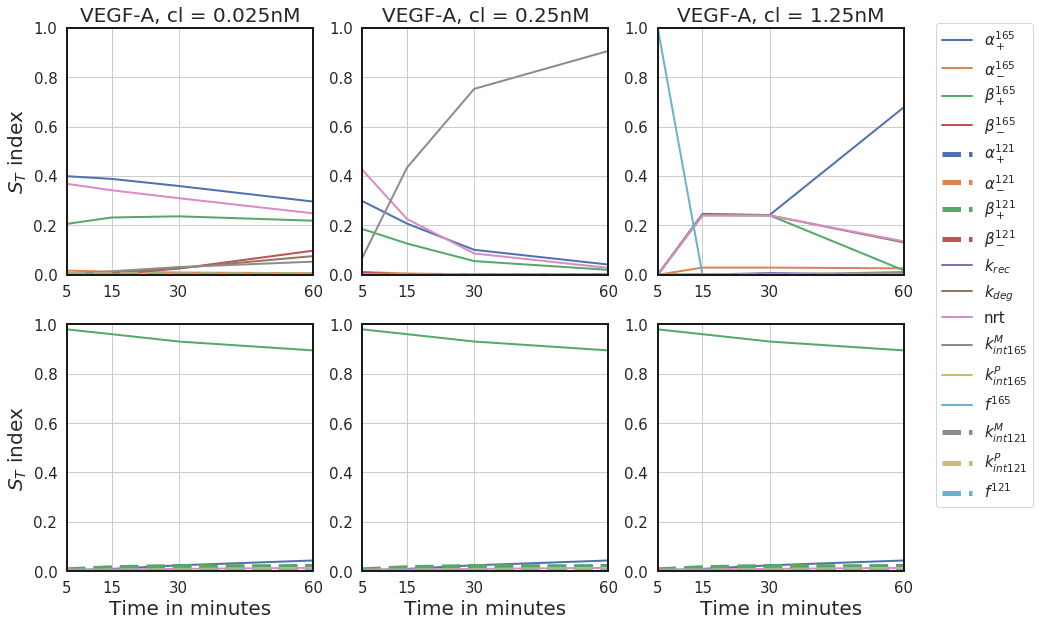

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Define some parameters for nice plots
sns.set_style("whitegrid")
my_axis_fontsize = 15
my_lab_fontsize = 20
my_tit_fontsize = 20
palette = sns.color_palette()

namesAll = [r'$\alpha_+^{165}$', r'$\alpha_-^{165}$',r'$\beta_+^{165}$', r'$\beta_-^{165}$', r'$\alpha_+^{121}$', r'$\alpha_-^{121}$', r'$\beta_+^{121}$',r'$\beta_-^{121}$',r'$k_{rec}$', 
         r'$k_{deg}$', r'nrt', r'$k_{int165}^M$', r'$k_{int165}^P$', r'$f^{165}$', r'$k_{int121}^M$', r'$k_{int121}^P$', r'$f^{121}$']


names = [r'$\alpha_+^{165}$', r'$\alpha_-^{165}$',r'$\beta_+^{165}$', r'$\beta_-^{165}$', r'$k_{rec}$',r'$k_{deg}$', r'nrt', r'$k_{int165}^M$', r'$k_{int165}^P$', r'$f^{165}$']

names = namesAll
#ind = [0,1,2,3, 8, 9, 10,11,16,17,18,19]
sobST = pd.DataFrame()
for j in range(0, len(names)):
    v = []
    for i in range(0, 24):
        v.append(sob['ST_%s'%i][j])
    sobST[names[j]] = np.array(v)

normsob = pd.DataFrame()
normfac = []
for i in range(0, 24):
    normfac.append(np.sum(sobST.T[i].values))
normfac = np.array(normfac)

for j in range(0, len(names)):
    v =[]
    for i in range(0,24):
        v.append(sobST[names[j]][i]/normfac[i])
    normsob[names[j]] = np.array(v)

col = [palette[0],palette[1],palette[2],palette[3],palette[0],palette[1],palette[2],palette[3],palette[4],
      palette[5],palette[6],palette[7], palette[8],palette[9],palette[7], palette[8],palette[9]]
mar = ['-','-','-','-','--','--','--','--', '-','-','-', '-','-','-','--','--','--']

wid = [2,2,2,2,5,5,5,5,2,2,2,2,2,2,5,5,5]

name165 = [0,1,2,3,8,9,10,11,12,13]    
name121 = [4,5,6,7,8,9,10,14,15,16] 
times = [5,15,30,60]
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,10))
plt.grid(True, which = 'both')
AX = [ax1, ax2, ax3,ax4, ax5, ax6]
for ax in AX:
    for axis in ['top','bottom','left','right']: 
        ax.spines[axis].set_color('k')  
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(labelsize = my_axis_fontsize)
    ax.set_ylim(0,1)
    ax.set_xticks([0, 5, 15, 30, 60]) 
    ax.set_xlim(5,60)
for j in range(0,len(names)):
    ax1.plot(times, normsob[names[j]][0:4], label = names[j], color = col[j], ls = mar[j], lw = wid[j])
    ax2.plot(times, normsob[names[j]][8:12], label = names[j], color = col[j], ls = mar[j], lw = wid[j])
    ax3.plot(times, normsob[names[j]][16:20], label = names[j], color = col[j], ls = mar[j], lw = wid[j])

for j in range(0,len(names)):
    ax4.plot(times, normsob[names[j]][4:8], label = names[j], color = col[j], ls = mar[j], lw = wid[j])
    ax5.plot(times, normsob[names[j]][12:16], label = names[j], color = col[j], ls = mar[j], lw = wid[j])
    ax6.plot(times, normsob[names[j]][20:24], label = names[j], color = col[j], ls = mar[j], lw = wid[j])

ax3.legend(loc = 0,fontsize = 15, bbox_to_anchor=(1.1, 1.05))

ax1.set_title('VEGF-A, cl = 0.025nM', fontsize = 20)
ax2.set_title('VEGF-A, cl = 0.25nM', fontsize = 20)
ax3.set_title('VEGF-A, cl = 1.25nM', fontsize = 20)
ax4.set_xlabel('Time in minutes', fontsize = 20)
ax5.set_xlabel('Time in minutes', fontsize = 20)
ax6.set_xlabel('Time in minutes', fontsize = 20)

ax1.set_ylabel(r'$S_T$ index', fontsize = 20)
ax4.set_ylabel(r'$S_T$ index', fontsize = 20)

fig.savefig('ST_index.pdf', bbox_inches='tight',  pad_inches = 1.5)
    

In [60]:
normsob

,$\alpha_+^{165}$,$\alpha_-^{165}$,$\beta_+^{165}$,$\beta_-^{165}$,$\alpha_+^{121}$,$\alpha_-^{121}$,$\beta_+^{121}$,$\beta_-^{121}$,$k_{rec}$,$k_{deg}$,nrt,$k_{int165}^M$,$k_{int165}^P$,$f^{165}$,$k_{int121}^M$,$k_{int121}^P$,$f^{121}$
0,0.398968,0.016765,0.206085,0.006134,1.333355e-08,1.300615e-06,1.397028e-08,1.142547e-08,0.000435,0.000976,0.368188,2.165193e-03,2.687764e-04,0.000012,1.267137e-06,1.386054e-08,1.291301e-08
1,0.388113,0.012742,0.231934,0.002321,4.822797e-09,7.423503e-08,1.745469e-05,2.565673e-09,0.000264,0.008001,0.342122,1.431023e-02,1.541323e-04,0.000004,7.195913e-08,1.745258e-05,4.652667e-09
2,0.359428,0.009190,0.236622,0.025067,2.662928e-09,5.658490e-09,4.908577e-06,1.199976e-09,0.000372,0.026903,0.310065,3.125144e-02,1.061597e-03,0.000030,5.927256e-09,4.905448e-06,2.580816e-09
3,0.296395,0.006205,0.218958,0.097482,5.963384e-10,5.739517e-10,1.284610e-06,5.834705e-11,0.000819,0.075631,0.248774,5.315592e-02,2.460923e-03,0.000116,5.964072e-10,1.282606e-06,5.850575e-10
4,0.003895,0.000267,0.979144,0.000293,4.032834e-03,9.914811e-07,5.717033e-03,3.641798e-06,0.000025,0.000017,0.006385,5.129684e-07,6.057029e-05,0.000051,6.955326e-07,9.948334e-05,6.713324e-06
5,0.009740,0.000356,0.959640,0.000314,6.746342e-03,5.552135e-06,1.456424e-02,1.839353e-05,0.000027,0.000104,0.007375,4.620429e-07,4.133240e-05,0.000035,7.009721e-07,8.441555e-04,1.898898e-04
6,0.024317,0.000591,0.929896,0.000275,1.167680e-02,1.935045e-05,1.963831e-02,7.446812e-05,0.000033,0.000506,0.009791,3.869028e-07,3.252713e-05,0.000027,6.743034e-07,2.695935e-03,4.253985e-04
7,0.043768,0.000919,0.894009,0.000211,1.926609e-02,7.119614e-05,1.710879e-02,5.451754e-04,0.000569,0.001667,0.013973,2.952441e-07,2.900999e-05,0.000024,6.532872e-07,7.504632e-03,3.328819e-04
8,0.298316,0.011350,0.185404,0.009803,3.059872e-11,1.591995e-18,2.971309e-12,2.553638e-14,0.000489,0.000949,0.424923,6.870318e-02,3.833801e-05,0.000023,8.239571e-21,1.312078e-13,2.166400e-15
9,0.207162,0.005245,0.126411,0.000382,4.183343e-12,1.198792e-18,7.448261e-13,1.898833e-14,0.000119,0.000828,0.225793,4.339865e-01,9.596883e-06,0.000064,1.098230e-20,6.544156e-13,7.669079e-16
